Imports

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures

Loading file

In [4]:
current_dir = os.getcwd()  # Текущая рабочая директория

file_path_read_train = os.path.join(current_dir, "agentic_ai_performance_dataset_20250622.csv")

df = pd.read_csv(file_path_read_train)


Columns

In [5]:
df.dtypes

agent_id                        object
agent_type                      object
model_architecture              object
deployment_environment          object
task_category                   object
task_complexity                  int64
autonomy_level                   int64
success_rate                   float64
accuracy_score                 float64
efficiency_score               float64
execution_time_seconds         float64
response_latency_ms            float64
memory_usage_mb                float64
cpu_usage_percent              float64
cost_per_task_cents            float64
human_intervention_required       bool
error_recovery_rate            float64
multimodal_capability             bool
edge_compatibility                bool
privacy_compliance_score       float64
bias_detection_score           float64
timestamp                       object
data_quality_score             float64
performance_index              float64
cost_efficiency_ratio          float64
autonomous_capability_sco

Estimated source data:

agent_type

model_architecture

deployment_environment

task_category

task_complexity

autonomy_level

human_intervention_required

multimodal_capability

edge_compatibility

timestamp

-------------------------------------
Estimated result data:

success_rate

accuracy_score

efficiency_score

execution_time_seconds

response_latency_ms

memory_usage_mb

cpu_usage_percent

cost_per_task_cents

error_recovery_rate

privacy_compliance_score

bias_detection_score

data_quality_score (Maybe it's source data!)

performance_index

cost_efficiency_ratio

autonomous_capability_score



----------------------------------------
Agent Types

In [7]:
df['agent_type'].value_counts()

agent_type
Customer Service        340
Project Manager         332
Marketing Assistant     322
Research Assistant      321
Email Manager           320
HR Recruiter            318
Document Processor      317
Social Media Manager    315
Task Planner            314
Financial Advisor       313
Sales Assistant         313
Content Creator         308
Data Analyst            299
QA Tester               296
Translation Agent       292
Code Assistant          280
Name: count, dtype: int64

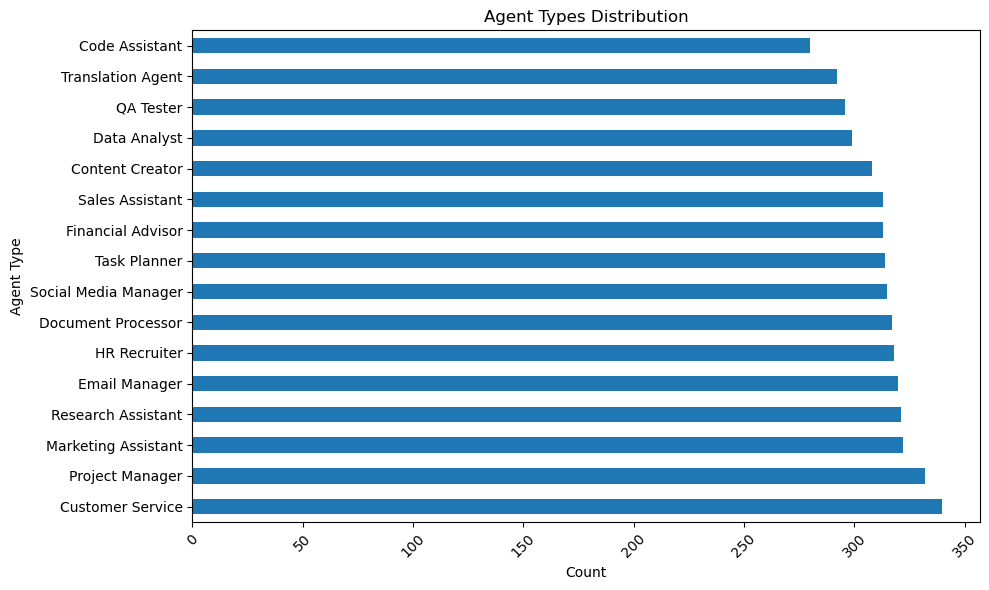

In [21]:
plt.figure(figsize=(10, 6))
df['agent_type'].value_counts().plot(kind='barh')
plt.title('Agent Types Distribution')
plt.ylabel('Agent Type')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Architecture

In [15]:
df['model_architecture'].value_counts()

model_architecture
InstructGPT       540
Transformer-XL    530
Claude-3.5        512
Falcon-180B       511
Mixtral-8x7B      502
GPT-4o            494
PaLM-2            484
Gemini-Pro        481
LLaMA-3           479
CodeT5+           467
Name: count, dtype: int64

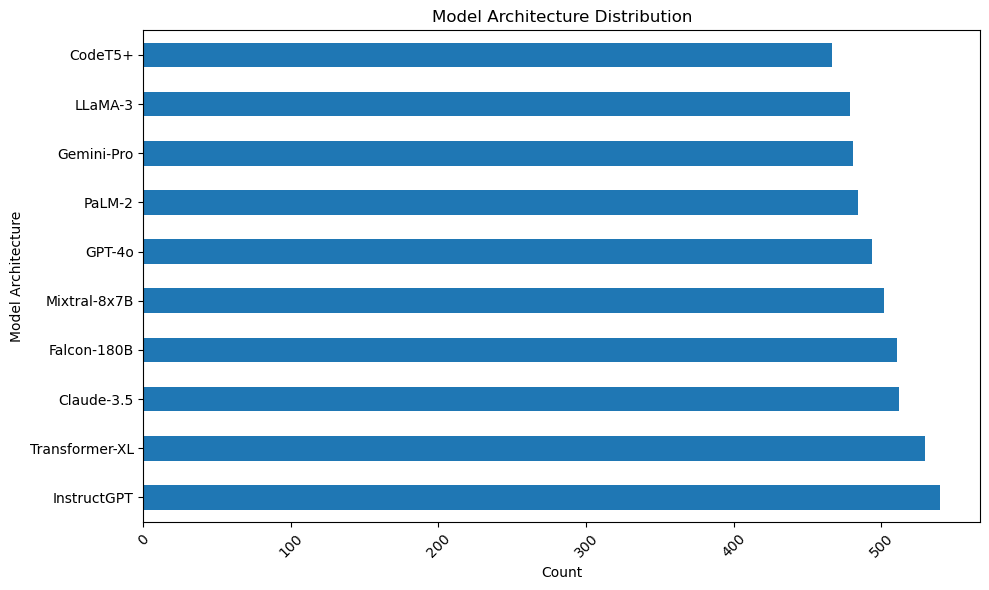

In [22]:
plt.figure(figsize=(10, 6))
df['model_architecture'].value_counts().plot(kind='barh')
plt.title('Model Architecture Distribution')
plt.ylabel('Model Architecture')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Deployment Environment


In [16]:
df['deployment_environment'].value_counts()

deployment_environment
Mobile     882
Cloud      840
Edge       836
Server     835
Hybrid     818
Desktop    789
Name: count, dtype: int64

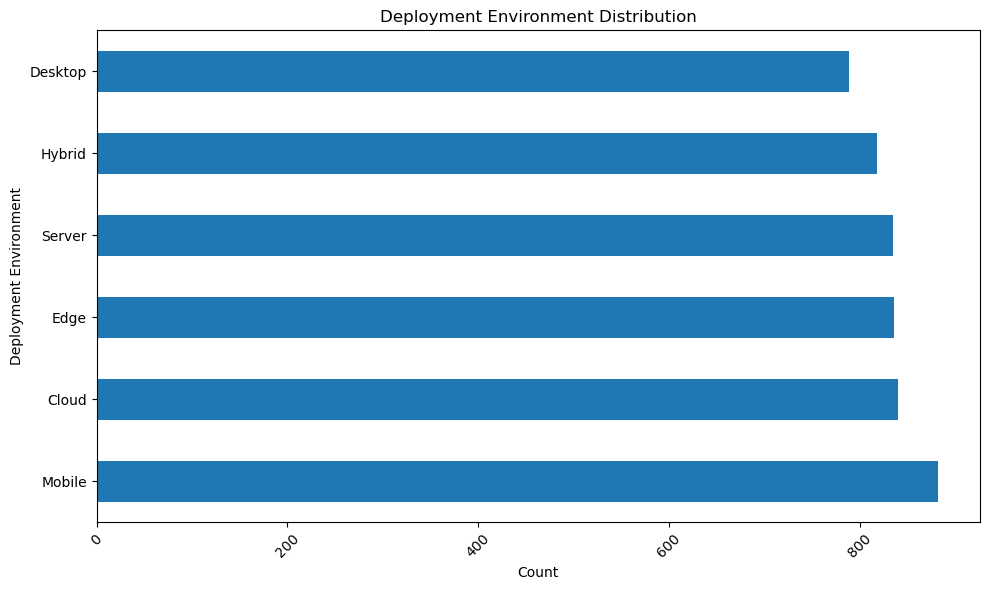

In [23]:
plt.figure(figsize=(10, 6))
df['deployment_environment'].value_counts().plot(kind='barh')
plt.title('Deployment Environment Distribution')
plt.ylabel('Deployment Environment')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task Category

In [18]:
df['task_category'].value_counts()

task_category
Communication               563
Text Processing             528
Problem Solving             523
Data Analysis               512
Learning & Adaptation       492
Planning & Scheduling       489
Code Generation             476
Creative Writing            475
Decision Making             471
Research & Summarization    471
Name: count, dtype: int64

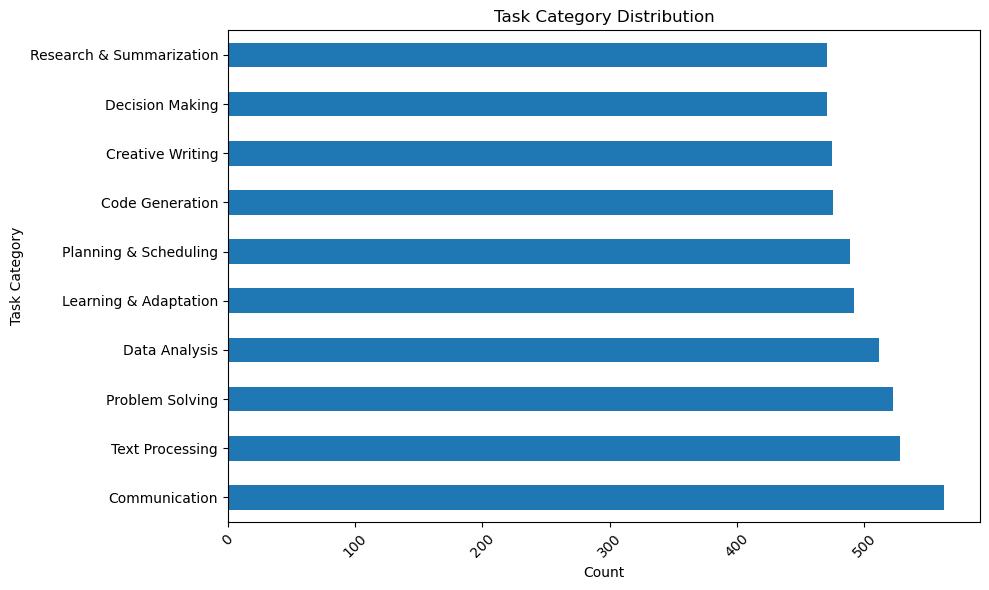

In [24]:
plt.figure(figsize=(10, 6))
df['task_category'].value_counts().plot(kind='barh')
plt.title('Task Category Distribution')
plt.ylabel('Task Category')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task Complexity

In [18]:
df['task_complexity'].value_counts().sort_index()

task_complexity
2     211
3     445
4     642
5     745
6     797
7     766
8     639
9     441
10    314
Name: count, dtype: int64

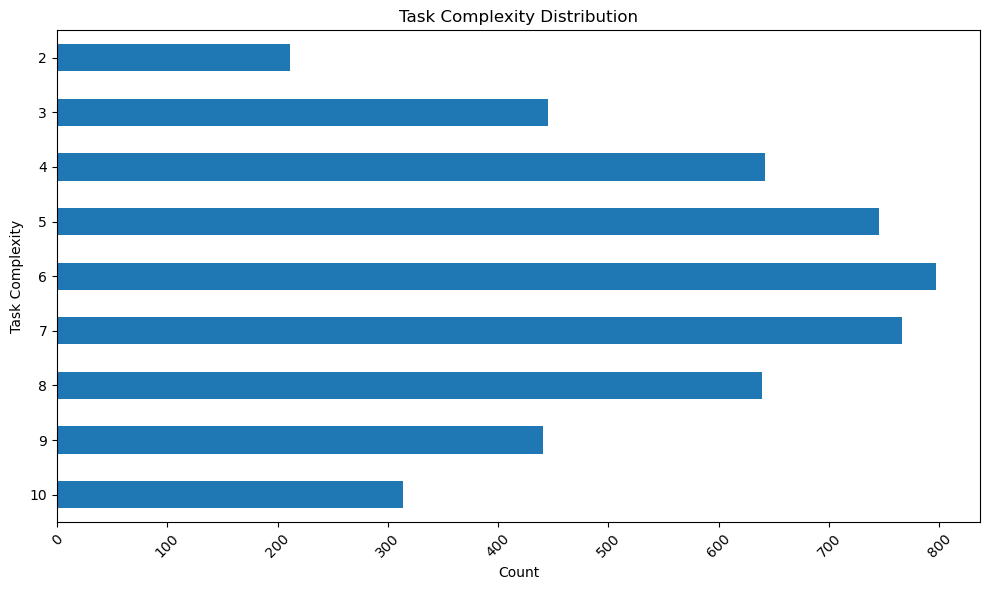

In [28]:
plt.figure(figsize=(10, 6))
df['task_complexity'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Task Complexity Distribution')
plt.ylabel('Task Complexity')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Autonomy Level

In [ ]:
df['autonomy_level'].value_counts().sort_index()

autonomy_level
6     732
7     712
5     698
4     593
8     593
10    468
9     410
3     377
2     253
1     164
Name: count, dtype: int64

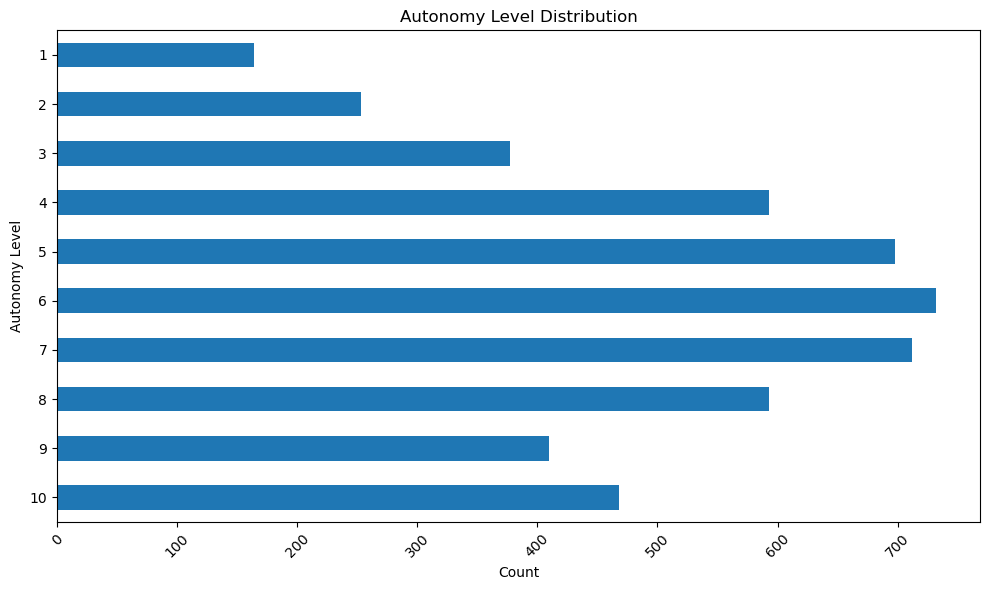

In [29]:
plt.figure(figsize=(10, 6))
df['autonomy_level'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Autonomy Level Distribution')
plt.ylabel('Autonomy Level')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Human Intervention Required

In [30]:
df['human_intervention_required'].value_counts()

human_intervention_required
True     4393
False     607
Name: count, dtype: int64

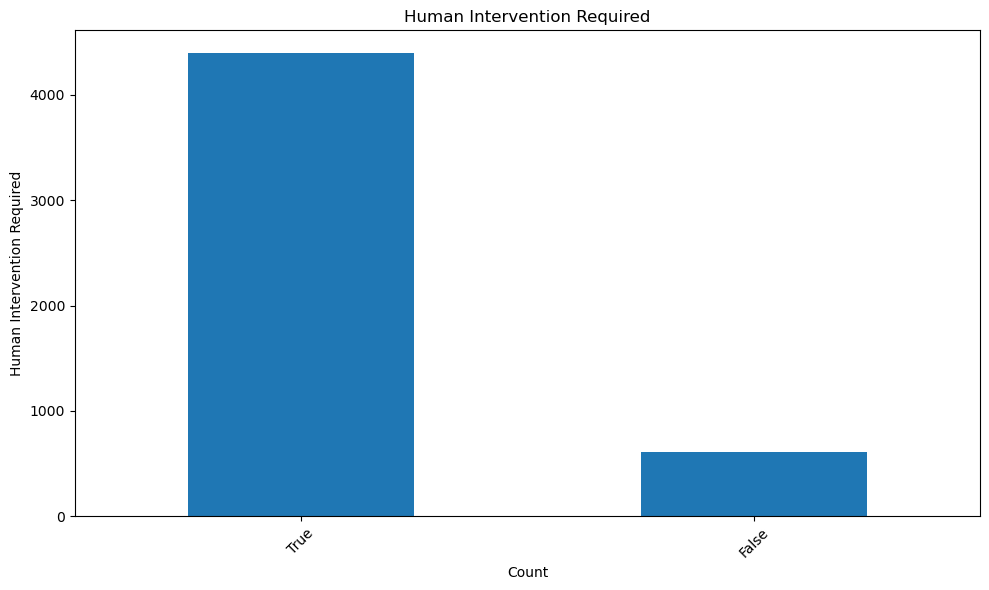

In [71]:
plt.figure(figsize=(10, 6))
df['human_intervention_required'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Human Intervention Required')
plt.ylabel('Human Intervention Required')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Multimodal Capability

💡 What does multimodal capability mean?
It refers to the AI's ability to work with multiple types of data simultaneously, such as:

📷 Images

📝 Text

🔊 Audio

📹 Video

📊 Sensor or numerical data



🔍 Examples:
Model/Agent	multimodal_capability

GPT-3	False (text only)

GPT-4V (Vision)	True

Gemini, Claude Opus	True

In [32]:
df['multimodal_capability'].value_counts()

multimodal_capability
False    4260
True      740
Name: count, dtype: int64

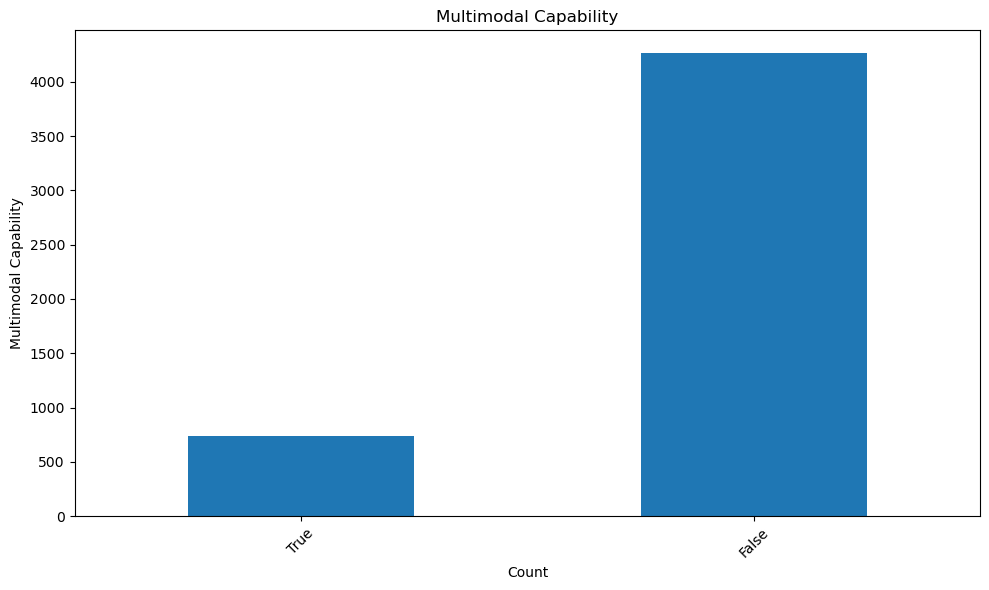

In [37]:
plt.figure(figsize=(10, 6))
df['multimodal_capability'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Multimodal Capability')
plt.ylabel('Multimodal Capability')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Edge Compatibility

💡 What is Edge in the AI context?
Edge computing means performing computation on or near the device (closer to the user), instead of sending all data to the cloud. Typical edge devices include:

📱 Smartphones

🤖 Robots

🕹️ IoT devices

🧠 Autonomous systems (e.g., cars, drones)

Running models on edge improves latency, privacy, and sometimes cost.

In [33]:
df['edge_compatibility'].value_counts()

edge_compatibility
True     2693
False    2307
Name: count, dtype: int64

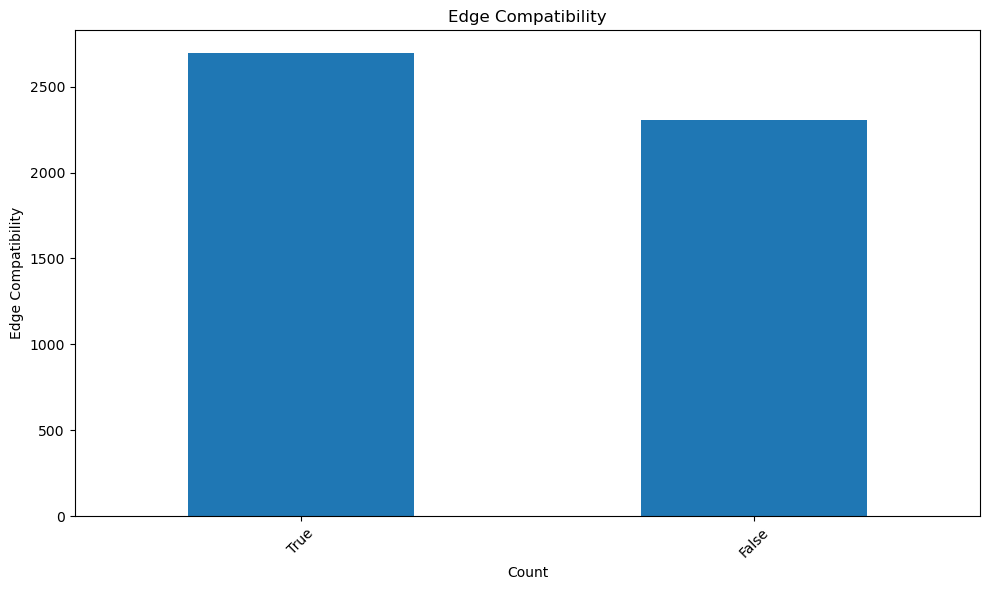

In [72]:
plt.figure(figsize=(10, 6))
df['edge_compatibility'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Edge Compatibility')
plt.ylabel('Edge Compatibility')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
df['multimodal_capability'].value_counts(ascending=True).plot(kind='bar')
plt.title('Multimodal Capability')
plt.ylabel('Multimodal Capability')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Success Rate

In [41]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['success_rate'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

success_rate
0–0.25         0
0.25–0.5    2790
0.5–0.75    1879
0.75–0.9     320
0.9–1         11
Name: count, dtype: int64

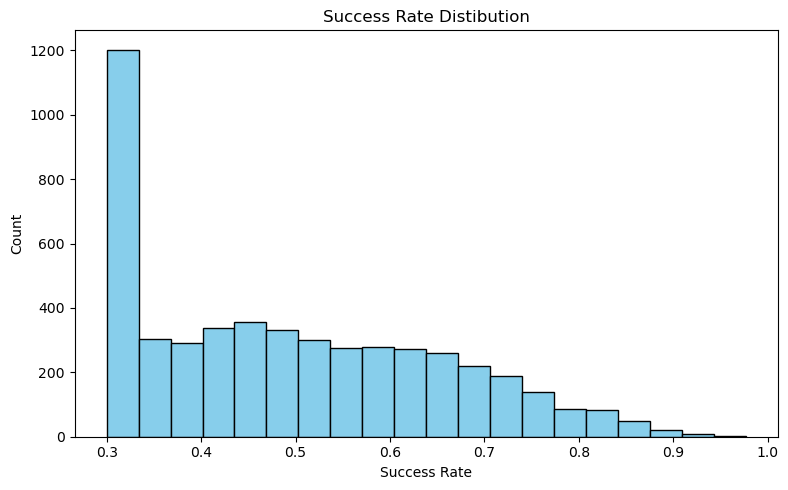

In [73]:
plt.figure(figsize=(8, 5))
plt.hist(df['success_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Success Rate Distibution')
plt.xlabel('Success Rate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

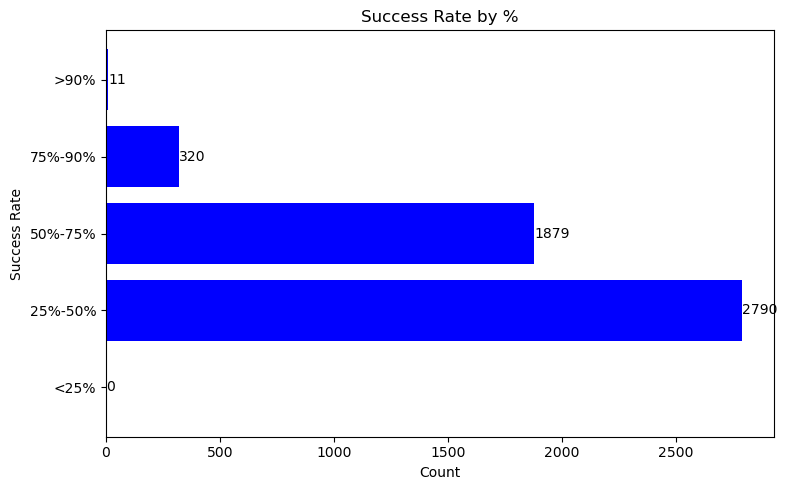

In [56]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['success_rate'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Success Rate by %')
plt.xlabel('Count')
plt.ylabel('Success Rate')
plt.tight_layout()
plt.show()

Accuracy Score

In [57]:
accuracy_score_min = df['accuracy_score'].min() 
accuracy_score_max = df['accuracy_score'].max()

print(f"Min: {accuracy_score_min} Max: {accuracy_score_max}")

Min: 0.4 Max: 0.9596


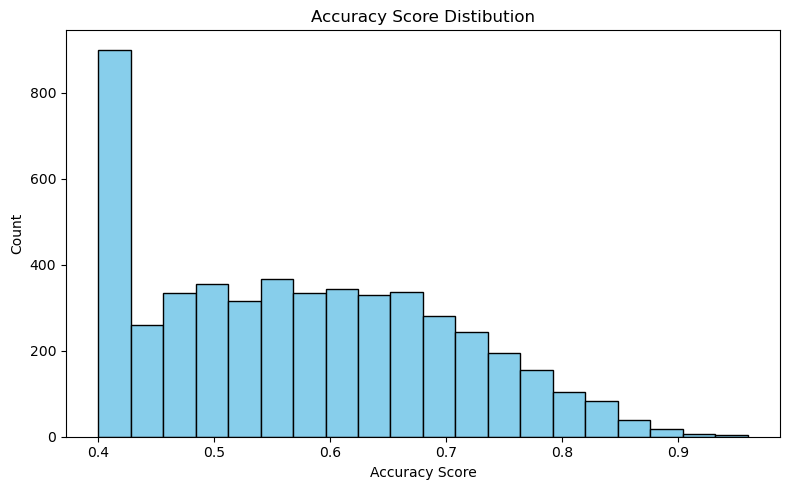

In [76]:
plt.figure(figsize=(8, 5))
plt.hist(df['accuracy_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Accuracy Score Distibution')
plt.xlabel('Accuracy Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [47]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['accuracy_score'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

accuracy_score
0–0.25         0
0.25–0.5    1698
0.5–0.75    2807
0.75–0.9     483
0.9–1         12
Name: count, dtype: int64

Efficience Score

In [37]:
efficiency_score_min = df['efficiency_score'].min() 
efficiency_score_max = df['efficiency_score'].max()

print(f"Min: {efficiency_score_min} Max: {efficiency_score_max}")

Min: 0.3 Max: 0.8855


In [48]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['efficiency_score'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

efficiency_score
0–0.25         0
0.25–0.5    1228
0.5–0.75    3321
0.75–0.9     451
0.9–1          0
Name: count, dtype: int64

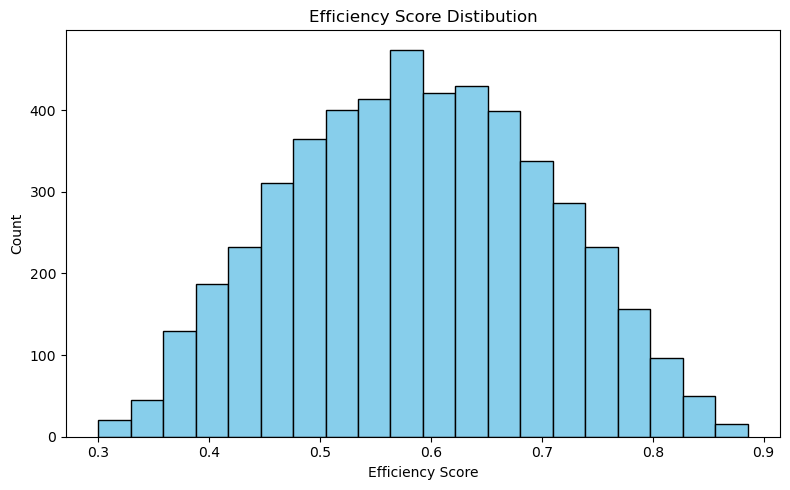

In [64]:
plt.figure(figsize=(8, 5))
plt.hist(df['efficiency_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Efficiency Score Distibution')
plt.xlabel('Efficiency Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

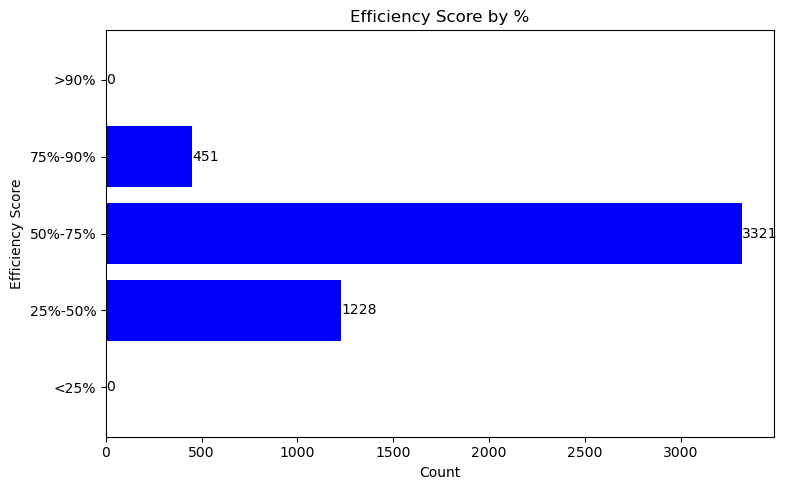

In [60]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['efficiency_score'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Efficiency Score by %')
plt.xlabel('Count')
plt.ylabel('Efficiency Score')
plt.tight_layout()
plt.show()

Privacy Compliance

------------------------------
The field privacy_compliance_score represents:

📊 A score indicating how well an AI agent complies with data privacy regulations and standards.

💡 What does Privacy Compliance mean in the AI context?
It refers to the agent's ability to:

Follow legal and regulatory requirements (e.g., GDPR, HIPAA, CCPA)

Avoid leaking personal or sensitive user data

Limit data retention (don't store data longer than needed)

Avoid unauthorized use of sensitive data

Apply anonymization and access controls


🔢 Score meaning:
Usually ranges from 0 to 1 (or 0% to 100%)

1.0 = Fully privacy-compliant

0.0 = No privacy safeguards

📌 Example use cases:

Agent	privacy_compliance_score	Notes

GPT-4 API	0.95	Doesn't store conversations by default

Custom bot	0.40	Keeps logs with user-identifiable data

Edge agent	1.00	Processes everything locally (no cloud)

In [44]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['privacy_compliance_score'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

privacy_compliance_score
0–0.25         0
0.25–0.5       0
0.5–0.75     864
0.75–0.9    2640
0.9–1       1496
Name: count, dtype: int64

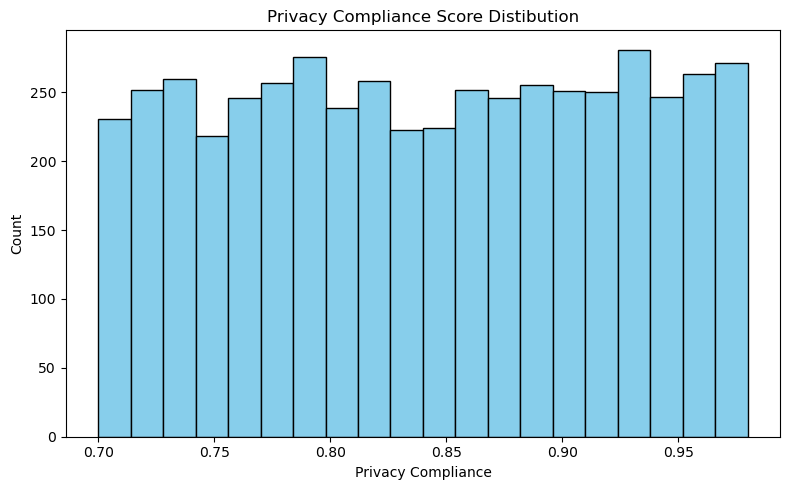

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df['privacy_compliance_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Privacy Compliance Score Distibution')
plt.xlabel('Privacy Compliance')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

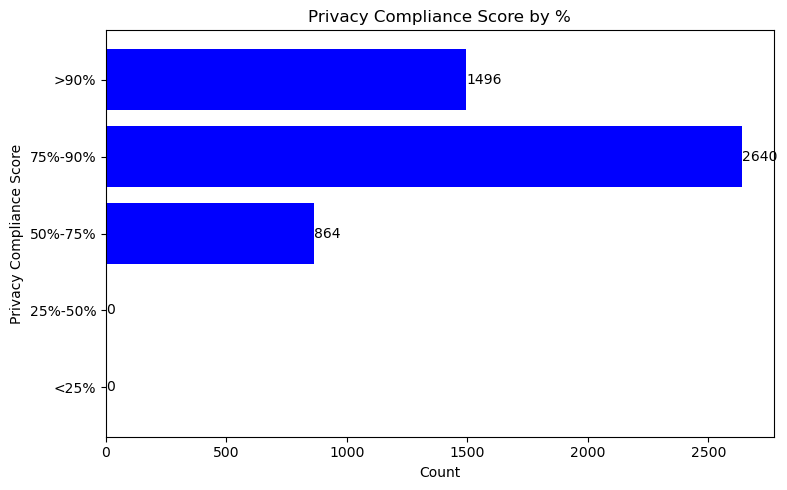

In [61]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['privacy_compliance_score'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Privacy Compliance Score by %')
plt.xlabel('Count')
plt.ylabel('Privacy Compliance Score')
plt.tight_layout()
plt.show()

Bias Detection Score

----------------------------------------------------
The field bias_detection_score represents:

⚖️ A score indicating how well the AI model detects or avoids bias in its responses or behavior.

💡 What is bias in AI?
Bias refers to systematic favoritism or discrimination in the model's behavior toward or against:

specific groups (e.g., gender, race, age)

political, cultural, or ideological stances

topics, languages, or regions

What does bias_detection_score measure?
It is a metric that reflects how well the model:

identifies potential bias in content

avoids generating biased or harmful responses

The values typically range from 0.0 to 1.0:

1.0 — the model actively monitors for bias and avoids it

0.0 — the model may produce biased or harmful outputs without checks

🧪 How is it measured?
It can be evaluated using:

specific bias benchmarks (e.g., StereoSet, CrowS-Pairs)

internal toxicity/fairness filters

the presence of safety guardrails during response generation

📌 Examples:

Model	bias_detection_score	Notes

GPT-4 (OpenAI)	0.91	Strong protections against gender/racial bias

LLaMA (raw)	0.55	May output offensive or biased content

Claude AI (Anthropic)	0.97	Heavily focused on ethics, fairness, and safety

In [ ]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['bias_detection_score'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

bias_detection_score
0–0.25         0
0.25–0.5       0
0.5–0.75    2175
0.75–1      2825
Name: count, dtype: int64

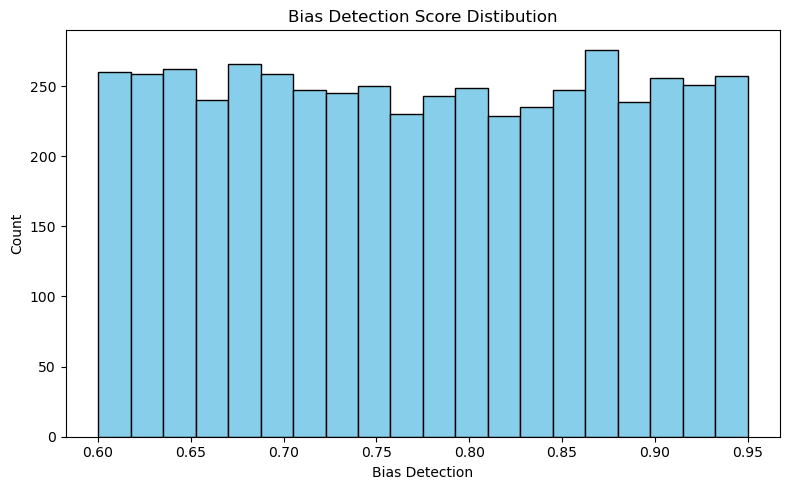

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(df['bias_detection_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Bias Detection Score Distibution')
plt.xlabel('Bias Detection')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

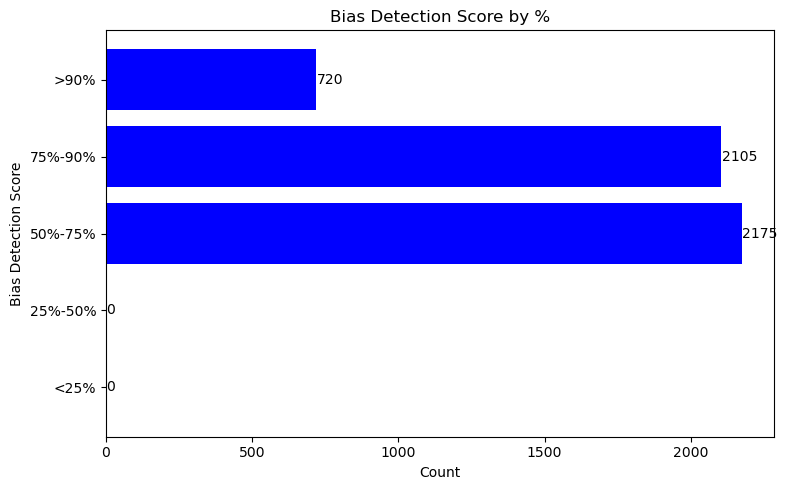

In [62]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['bias_detection_score'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Bias Detection Score by %')
plt.xlabel('Count')
plt.ylabel('Bias Detection Score')
plt.tight_layout()
plt.show()

Data Quality Score

--------------------------------
MUST CHECK!

Is data_quality_score an input or output?

In [43]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['data_quality_score'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

data_quality_score
0–0.25         0
0.25–0.5       0
0.5–0.75       1
0.75–0.9    3287
0.9–1       1712
Name: count, dtype: int64

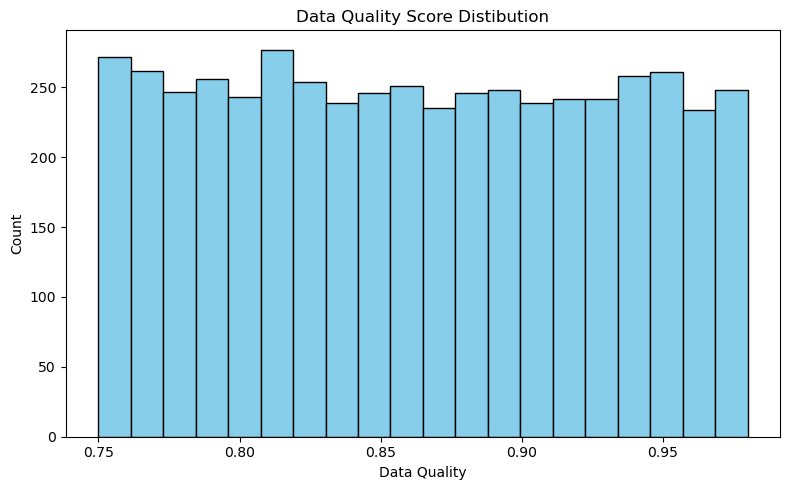

In [74]:
plt.figure(figsize=(8, 5))
plt.hist(df['data_quality_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Data Quality Score Distibution')
plt.xlabel('Data Quality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

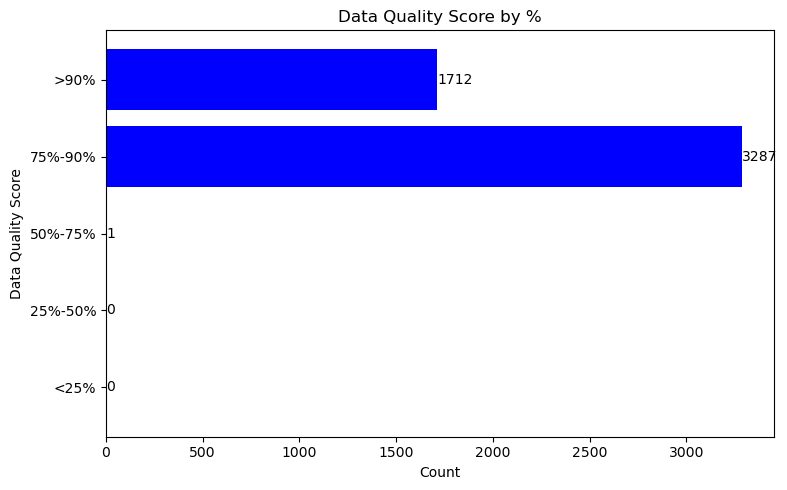

In [75]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['data_quality_score'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Data Quality Score by %')
plt.xlabel('Count')
plt.ylabel('Data Quality Score')
plt.tight_layout()
plt.show()

Performance Index

In [45]:
# Определяем фиксированные интервалы
bins = [0, 0.25, 0.5, 0.75, 0.9, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–0.9', '0.9–1']

# Разбиваем success_rate по этим интервалам
quartile_bins = pd.cut(df['performance_index'], bins=bins, labels=labels, include_lowest=True, right=True)

# Считаем количество значений в каждом интервале
counts = quartile_bins.value_counts().sort_index()

counts

performance_index
0–0.25         0
0.25–0.5    2083
0.5–0.75    2541
0.75–0.9     376
0.9–1          0
Name: count, dtype: int64

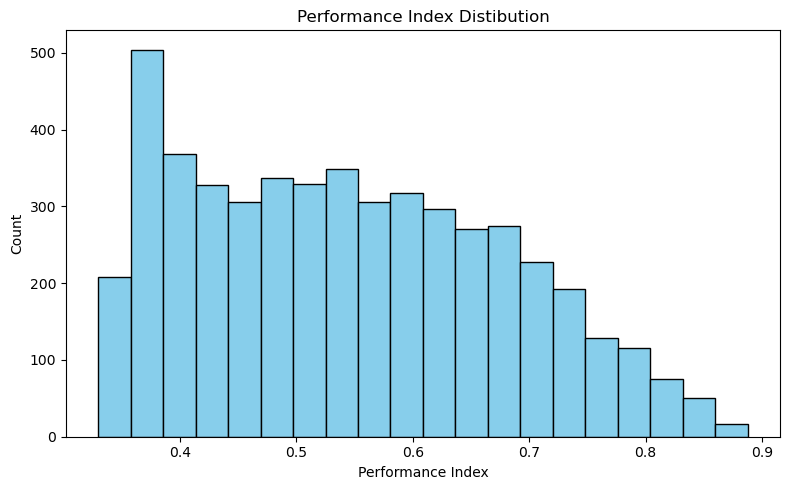

In [67]:
plt.figure(figsize=(8, 5))
plt.hist(df['performance_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Performance Index Distibution')
plt.xlabel('Performance Index')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

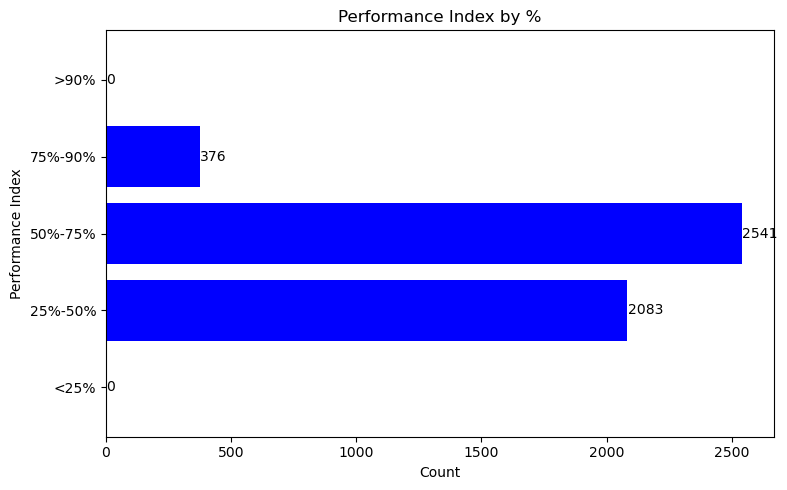

In [68]:
labels = ['<25%', '25%-50%', '50%-75%', '75%-90%', '>90%']
quartile_bins = pd.cut(df['performance_index'], bins=bins, labels=labels, include_lowest=True, right=True)
counts = quartile_bins.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(counts.index, counts.values, color='blue')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center')

plt.title('Performance Index by %')
plt.xlabel('Count')
plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

Cost Efficiency Ratio

----------------------------
The field cost_efficiency_ratio represents:

💰📈 The ratio between an agent’s efficiency and its cost — essentially, how much useful performance you get per unit of cost.

💡 What it means:
This is a composite metric typically calculated as:

cost_efficiency_ratio = efficiency_score / cost_per_task_cents

It measures how cost-effective an agent is in performing its tasks.

🔢 Interpreting the values:

Higher values = better performance for less cost (more cost-efficient)

Lower values = poor efficiency or high cost (less cost-effective)

📌 Examples:

Agent	efficiency_score	cost_per_task_cents	cost_efficiency_ratio	Notes

GPT-4 Turbo	0.85	0.015	56.7	High efficiency per cost

Legacy Model	0.50	0.025	20.0	Slower and more expensive

Edge Agent	0.65	0.005	130.0	Very cheap, reasonable performance


In [50]:
cost_efficiency_ratio_min = df['cost_efficiency_ratio'].min() 
cost_efficiency_ratio_max = df['cost_efficiency_ratio'].max()

print(f"Min: {cost_efficiency_ratio_min} Max: {cost_efficiency_ratio_max}")

Min: 5.951596638655461 Max: 219.327027027027


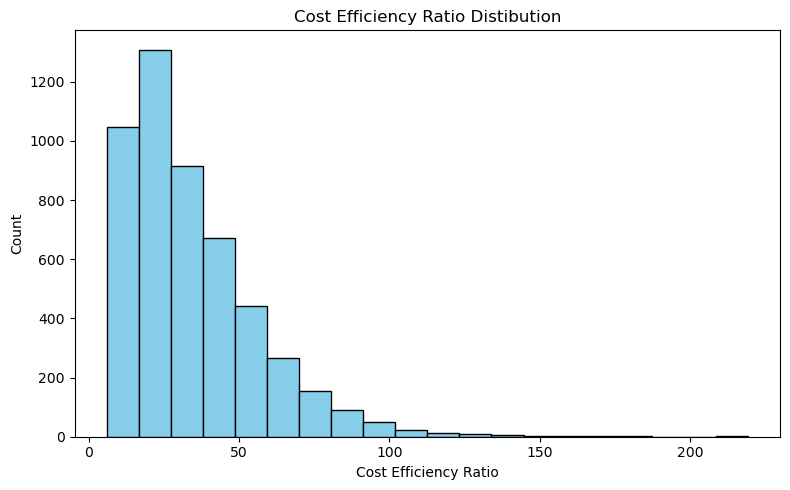

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(df['cost_efficiency_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Cost Efficiency Ratio Distibution')
plt.xlabel('Cost Efficiency Ratio')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Autonomous Capability Score

In [51]:
autonomous_capability_score_min = df['autonomous_capability_score'].min() 
autonomous_capability_score_max = df['autonomous_capability_score'].max()

print(f"Min: {autonomous_capability_score_min} Max: {autonomous_capability_score_max}")

Min: 56.284 Max: 147.69400000000002


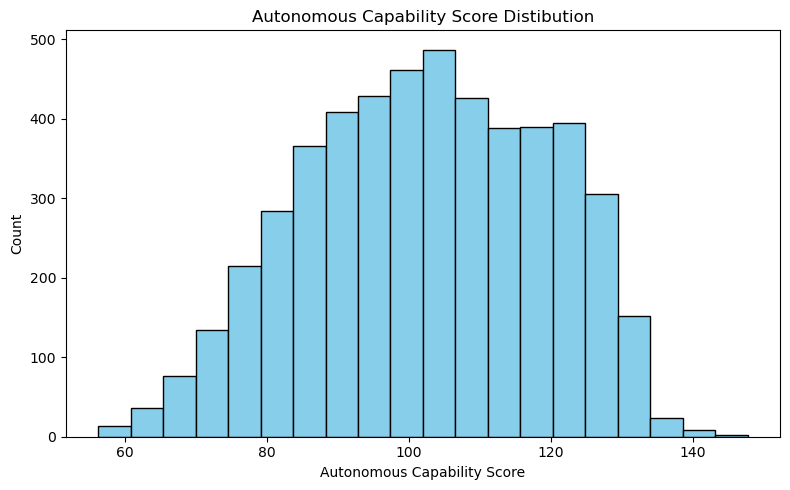

In [70]:
plt.figure(figsize=(8, 5))
plt.hist(df['autonomous_capability_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Autonomous Capability Score Distibution')
plt.xlabel('Autonomous Capability Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()